In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from JetFit import FluxGeneratorClass

% matplotlib inline

## Load Table 

In [2]:
Table = './Table/Table.h5'
FluxGenerator = FluxGeneratorClass(Table)

## Set Parameter Dictionary

In [3]:
### Best-fitting Parameters for GW170817
P = {
    'E': 0.15869069395227384,
    'Eta0': 7.973477192135503,
    'GammaB': 11.000923300022666,
    'dL': 0.012188,
    'epsb': 0.013323706571267526,
    'epse': 0.04072783842837688,
    'n': 0.0009871221028954489,
    'p': 2.1333493591554804,
    'theta_obs': 0.4769798916899842,
    'xiN': 1.0,
    'z': 0.00973
}

DF = pd.read_csv('./Data/GW170817.csv')
Times, TimeBnds, Fluxes, FluxErrs, Freqs = DF['Times'].values, DF['TimeBnds'].values, DF['Fluxes'].values, DF['FluxErrs'].values, DF['Freqs'].values


## Plot Light Curve from Generator

In [4]:
def PltDF(ax, DF, ColorList=['orange','red','g','b'], ScaleFactor=[1.,1.,1.,1.], Legend=True, XAxisDay=False):
    Freqs = DF['Freqs'].unique()

    for Freq,Color,Scale in zip(Freqs,ColorList,ScaleFactor):
        SubDF = DF[DF['Freqs']==Freq]
        if XAxisDay:
            Times = SubDF['Times']/24./3600
        else:
            Times = SubDF['Times']
        Fluxes = SubDF['Fluxes']
        FluxErrs = SubDF['FluxErrs']
        if max(ScaleFactor) > 1.:
            label = '%.1e x %d' %(Freq, Scale)
        else:
            label='%.1e' %Freq
        ax.errorbar(Times, Fluxes*Scale, yerr = FluxErrs*Scale, color=Color, fmt = '.', label=label)

    ax.set_yscale('log')                                                                              
    ax.set_xscale('log')     
    ax.set_ylabel('Flux density (mJy)')     
    if XAxisDay:
        ax.set_xlabel('Time (day)') 
    else:
        ax.set_xlabel('Time (s)') 
    if Legend: 
        ax.legend(loc=0);

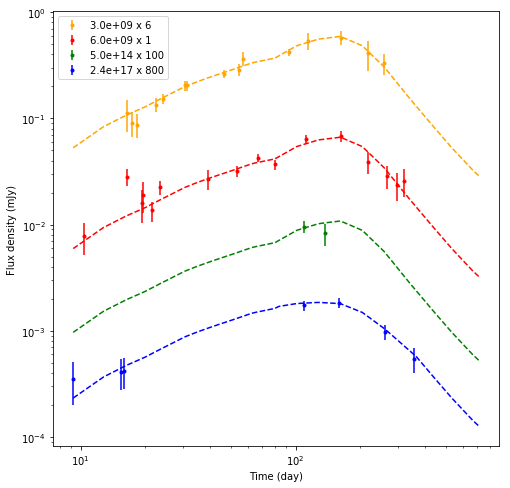

In [5]:
fig, ax = plt.subplots(figsize=(8,8));
ColorList = ['orange','red','g','b']
ScaleFactor =  [6.,1.,100., 800.]

PltDF(ax, DF, ColorList=ColorList, ScaleFactor=ScaleFactor, Legend=True, XAxisDay=True)

NPoints = 200
Left = 1.; Right = 2.
for i, Freq in enumerate(DF['Freqs'].unique()):
    idx = DF['Freqs']==Freq    
    NewTimes = np.linspace(DF['Times'].min()*Left, DF['Times'].max()*Right, NPoints)
    NewFreqs = np.ones(len(NewTimes))*Freq
    
    ### Generate Fluxes 
    FluxesModel = np.asarray(FluxGenerator.GetSpectral(NewTimes, NewFreqs, P))
    
    plt.loglog(NewTimes/24./3600., FluxesModel*ScaleFactor[i], '--', color=ColorList[i], linewidth=1.5);